In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plotLosses(slurm_names):
    results = []
    for ind, slurm_name in enumerate(slurm_names): 
        with open('slurm-files/'+slurm_name) as f:
            line = f.readline()
            cnt = 1
            while line:
                #prfloat("Line {}: {}".format(cnt, line.strip()))
                line = f.readline()
                cnt += 1

                if 'Training Loss average' in line: 
                    accuracy = float(line.split(' ')[-1].strip())
                    loss = float(line.split(' ')[-3].strip())
                    testing_method = 'Train'
                    results.append([testing_method, loss, accuracy])

                elif 'CV Loss average' in line:
                    loss = float(line.split(' ')[-4].strip())
                    accuracy = float(line.split(' ')[-1].strip())
                    testing_method = 'CV'
                    results.append([testing_method, loss, accuracy])

    results=pd.DataFrame(results, columns = ['EvalMethod', 'Loss', 'SeqAcc'])

    for key, item in results.groupby('EvalMethod').groups.items():

        plt.plot(range(results.iloc[item].shape[0]), results.iloc[item]['Loss'])
        plt.title('Loss for '+key)
        plt.xlabel('Epochs')
        plt.show()

        plt.plot(range(results.iloc[item].shape[0]), results.iloc[item]['SeqAcc'])
        plt.title('SeqAcc for '+key)
        plt.xlabel('Epochs')
        plt.show()

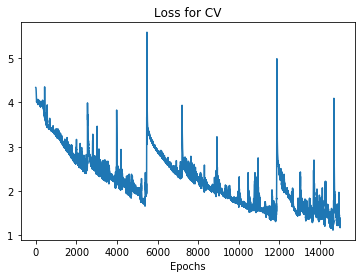

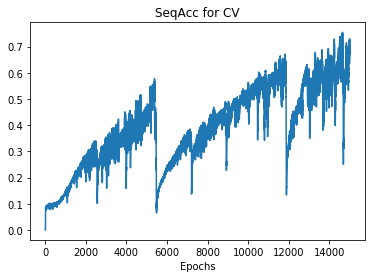

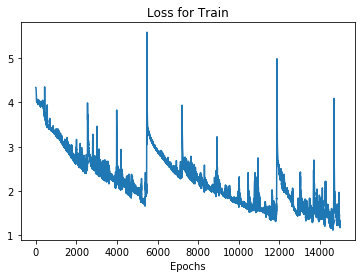

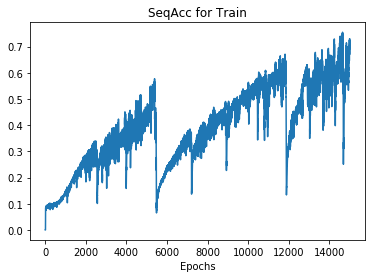

In [11]:
slurm_names = ['slurm-48711284.out']  #['slurm-48621927.out','slurm-48625268.out','slurm-48648777.out' ]

plotLosses(slurm_names)

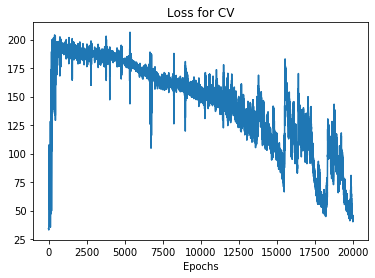

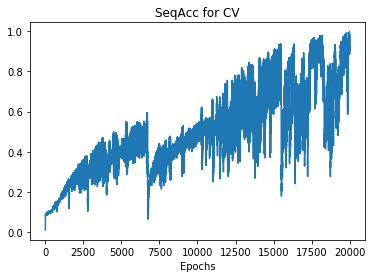

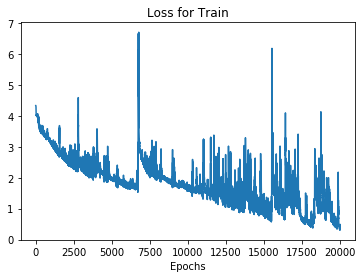

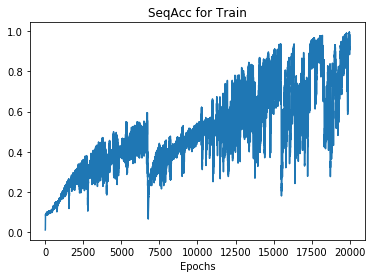

In [12]:
slurm_names = ['slurm-48659412.out',]

plotLosses(slurm_names)